# meringkas berita
berfungsi untuk mengetahui berita secara ringkas

# pembersihan teks

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import seaborn as sns

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OKTAVIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\OKTAVIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df = pd.read_csv('berita_kompas.csv')
df.head()

,judul,isi,tanggal,kategori
0,"Tiga Pengeroyok di Cakung Ditangkap, Satu Lain...","JAKARTA, KOMPAS.com - Jajaran Satreskrim Polre...","Kompas.com - 10/09/2024, 12:27 WIB",Megapolitan
1,Puan Beri Sinyal RUU Perampasan Aset Tak Disel...,"JAKARTA, KOMPAS.com - Ketua DPR RI Puan Mahara...","Kompas.com - 10/09/2024, 12:26 WIB",Nasional
2,PDI-P Duga Gugatan SK Kepengurusan Upaya Sabot...,"JAKARTA, KOMPAS.com - Ketua Dewan Pimpinan Pus...","Kompas.com - 10/09/2024, 12:24 WIB",Nasional
3,Jalan Jatiwaringin Bekasi Arah Jakarta Macet I...,"BEKASI, KOMPAS.com - Arus lalu lintas di Jalan...","Kompas.com - 10/09/2024, 12:17 WIB",Megapolitan
4,Nasib Taruna Akpol Usai Dipecat karena Lawan P...,"JAKARTA, KOMPAS.com - Taruna Akpol berinisial...","Kompas.com - 10/09/2024, 12:16 WIB",Nasional


preprocessing

In [5]:
def preptext(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
    text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
    text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text.lower())

    sw = set(stopwords.words("indonesian"))
    words = [word for word in words if word not in sw]
    return ' '.join(words)


In [6]:
df['isi_baru'] = df['isi'].apply(preptext)

memisahka kalimat berita

In [7]:
kalimat = nltk.sent_tokenize(df['isi_baru'][1])
print(kalimat)

['jakarta kompas.com ketua dpr ri puan maharani sinyal menuntaskan rancangan undangundang perampasan aset tindak pidana periode .', 'puan menyebut kerja dpr periode .', 'pendek .', 'anggota dpr periode puan gedung mprdpr ri jakarta selasa .', 'dpr fokus menuntaskan kerjakerjanya periodenya .', 'dpr ri periode kerjanya oktober .', 'baca : sahroni utamakan pengembalian kerugian negara icw sindir ruu perampasan aset mandek dpr fokus halhal selesaikan tanggal oktober .', 'ruu perampasan aset bahas periode .', 'tunggu pergantian periode menyelesaikan halhal diselesaikan .', 'wakil ketua komisi iii dpr ri ahmad sahroni rancangan undangundang perampasan aset tindak pidana disahkan sisa jabatan dpr periode .', 'sahroni permintaan presiden jokowi ruu perampasan aset disahkan sulit terwujud jabatan anggota dpr periode tersisa hitungan .', 'jokowi ruu perampasan aset diselesaikan .', 'sidang tinggal pembahasan dilanjutkan periode sidang sahroni ditemui minggu .', 'baca : jokowi komisi iii ruu per

TF-IDF

In [8]:
vectorizer = TfidfVectorizer()
tfidf_berita = vectorizer.fit_transform(kalimat)

fitur = vectorizer.get_feature_names_out()
tfidf_hasil = pd.DataFrame(data=tfidf_berita.toarray(), columns=fitur)
tfidf_hasil

,ahmad,anggota,aset,aspek,baca,bahas,com,dilanjutkan,disahkan,diselesaikan,...,tersisa,terwujud,tindak,tinggal,tunggu,undangundang,utama,utamakan,uu,wakil
0,0.000000,0.000000,0.166343,0.000000,0.000000,0.000000,0.293681,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.256437,0.000000,0.000000,0.256437,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.352373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.152811,0.000000,0.235576,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.26979,0.000000,0.000000
7,0.000000,0.000000,0.376924,0.000000,0.000000,0.665465,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.399739,...,0.00000,0.00000,0.000000,0.000000,0.457796,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.282532,0.000000,0.160028,0.000000,0.000000,0.000000,0.000000,0.000000,0.221280,0.000000,...,0.00000,0.00000,0.246702,0.000000,0.000000,0.246702,0.000000,0.00000,0.000000,0.282532


Cosine similaritas

In [9]:
cosine = cosine_similarity(tfidf_berita, tfidf_berita)

similaritas = pd.DataFrame(cosine, index=range(len(kalimat)), columns=range(len(kalimat)))
similaritas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.184392,0.0,0.281836,0.152595,0.177016,0.070379,0.173597,0.033158,0.473177,0.101952,0.121956,0.025213,0.095540,0.030562,0.0,0.000000
1,0.184392,1.000000,0.0,0.253376,0.072050,0.168307,0.037750,0.093114,0.064056,0.118599,0.085603,0.000000,0.048709,0.000000,0.059042,0.0,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.281836,0.253376,0.0,1.000000,0.051248,0.243240,0.026851,0.066231,0.045562,0.142386,0.155006,0.000000,0.034646,0.000000,0.041996,0.0,0.000000
4,0.152595,0.072050,0.0,0.051248,1.000000,0.076376,0.140181,0.000000,0.000000,0.071759,0.038846,0.000000,0.000000,0.000000,0.053585,0.0,0.000000
5,0.177016,0.168307,0.0,0.243240,0.076376,1.000000,0.163730,0.098706,0.067903,0.212203,0.090743,0.000000,0.051634,0.000000,0.062587,0.0,0.000000
6,0.070379,0.037750,0.0,0.026851,0.140181,0.163730,1.000000,0.181602,0.094169,0.119346,0.139385,0.176618,0.040463,0.190509,0.070182,0.0,0.047432
7,0.173597,0.093114,0.0,0.066231,0.000000,0.098706,0.181602,1.000000,0.075134,0.167006,0.256105,0.435647,0.057132,0.341285,0.103859,0.0,0.000000
8,0.033158,0.064056,0.0,0.045562,0.000000,0.067903,0.094169,0.075134,1.000000,0.031899,0.034536,0.225903,0.039303,0.000000,0.000000,0.0,0.000000
9,0.473177,0.118599,0.0,0.142386,0.071759,0.212203,0.119346,0.167006,0.031899,1.000000,0.275537,0.117326,0.066630,0.245067,0.058803,0.0,0.049672


Graph

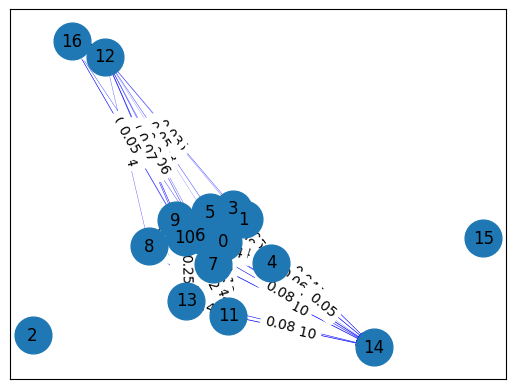

In [10]:
graph = nx.DiGraph()
for i in range(len(cosine)):
    graph.add_node(i)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)): 
        if cosine[i, j] > 0:  
            graph.add_edge(i, j, weight=cosine[i, j])



pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=700)
edges = nx.draw_networkx_edges(
    graph, pos, 
    edge_color='blue', 
    width=[graph[u][v]['weight'] * 5 for u, v in graph.edges()]
)
nx.draw_networkx_labels(graph, pos)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f'{w:.2f}' for u, v, w in graph.edges(data='weight')})

plt.show()

## matrix sentralitas

closeness centrality

In [11]:
closeness_word = nx.closeness_centrality(graph)

sorted_closeness_preprocessing = sorted(closeness_word.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 14: 0.6923
Node 12: 0.5682
Node 10: 0.5625
Node 9: 0.5000
Node 13: 0.4727
Node 11: 0.4464
Node 16: 0.4201
Node 8: 0.3828
Node 7: 0.3214
Node 6: 0.3125
Node 5: 0.2500
Node 4: 0.1875
Node 3: 0.1250
Node 1: 0.0625
Node 0: 0.0000
Node 2: 0.0000
Node 15: 0.0000


In [12]:
rangkuman = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_word in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    rangkuman += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_word:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 14: Closeness Centrality = 0.6923
Kalimat: fraksi dpr membahas mendalam aspek terkait ruu .

Node 12: Closeness Centrality = 0.5682
Kalimat: sidang tinggal pembahasan dilanjutkan periode sidang sahroni ditemui minggu .

Node 10: Closeness Centrality = 0.5625
Kalimat: sahroni permintaan presiden jokowi ruu perampasan aset disahkan sulit terwujud jabatan anggota dpr periode tersisa hitungan .



membuat rangkuman dengan page rank

In [13]:
ranked_page = nx.pagerank(graph)

sorted_page= sorted(ranked_page.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, ranked_page in sorted_page:
    print(f"Node {node}: {ranked_page:.4f}")

Page Rank :
Node 14: 0.1851
Node 13: 0.1422
Node 11: 0.0960
Node 16: 0.0720
Node 10: 0.0719
Node 9: 0.0629
Node 12: 0.0456
Node 6: 0.0437
Node 5: 0.0430
Node 7: 0.0415
Node 8: 0.0359
Node 3: 0.0327
Node 4: 0.0291
Node 1: 0.0261
Node 0: 0.0241
Node 2: 0.0241
Node 15: 0.0241


hasil rangkuman

In [14]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_page[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 14: Page Rank = 0.1851
Kalimat: fraksi dpr membahas mendalam aspek terkait ruu .

Node 13: Page Rank = 0.1422
Kalimat: baca : jokowi komisi iii ruu perampasan aset disahkan politikus partai nasdem mengeklaim keterbatasan kendala utama mengesahkan ruu perampasan aset .

Node 11: Page Rank = 0.0960
Kalimat: jokowi ruu perampasan aset diselesaikan .

